**Assignment Title: Lab Assignment 5 - Topic Modeling with BERT**

**Author name: Garima Astha**

**ASU ID: 1234333687 (gastha)**

**file creation date: 02 March 2025**

**Objectives**

In this lab assignment, you will use BERTopic method to explore the Yelp Review data and identify themes/topics and related words from customer reviews.

Lab Assignment 5: Topic Modeling with BERT

Objective: In this lab assignment, you will use BERTopic method to explore the Yelp Review data and identify themes/topics and related words from customer reviews.

Submission:

LA5_Lastname_FirstName.ipynb, a Python Notebook, which contains the code and answers that meet the following requirement.
LA5_Lastname_FirstName.html, the HTML output file rendered from the Python Notebook.
Input: restaurant_reviews_az.csv (the same as previous lab assignments)

Use beginning text to include assignment title, author name, your ASU ID, and the file creation date.

Create code chunks to meet the following requirements.

Code Cell 1 (5%) - Library and data import.
Code Cell 2 (5%) - Calculate and visualize the distribution of review length.
Code Cell 3 (10%) - Build a BERTopic Model with UMAP (target dimension of 5, n_neighbors of 15, and the usage of cosine similarity to measure the distance).
Code Cell 4 (5%) - Visualize the most relevant words for the top 10 topics
Code Cell 5 (5%) - Visualize the topic hierarchy for the top 30 topics
Code Cell 6 (5%) - Reduce the number of topics to 15, visualize the most relevant words for each topic and the topic hierarchy
Code Cell 7 (5%) - Get the topic allocation of the first 5 reviews in the data
Code Cell 8 (5%) - Use get_topic() to show most relevant words for the first topic
Text Cell 9 (5%) - Interpret each topic: What is the theme of each topic?
Code Cell 10 (5%) - Visualize the topic frequency of the top 6 topics over time with the entire dataset.
Code Cell 11 (5%) - Visualize the topics per star rating (e.g., 1, 2, 3, 4, 5).
Text Cell 12 (10%) - Comment on your findings based on the visualized topic frequency over time and topics per star rating in Code cells 10 and 11. In general, what are the major topics mentioned about good and bad restaurant experiences, respectively? What are the business implications?
Code Cell 13 (10%) - Specify a few topics in the restaurant reviews and use zero shot topic modeling to create a topic model
Code Cell 14 (5%) - Visualize the most relevant words for the top 10 topics and the topic hierarchy for the zero shot topic model
Text Cell 15 (5%) - Interpret each topic in the zero shot topic model: what is each topic about?
Text Cell 16 (5%) - Acknowledge if you have used any GenAI tools in this assignment and anyone you have worked together with on this assignment.
Code cell 17 (5%) - Render HTML output of this Python notebook

**Import libraries and data file**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the restaurant review data
file_path = r'/content/sample_data/restaurant_reviews_az.csv'
df = pd.read_csv(file_path)

# Show a summary of the input data
print("Data Summary:")
print(df.describe())
print("\nData Information:")
print(df.info())

Data Summary:
              stars        useful         funny          cool
count  48147.000000  48147.000000  48147.000000  48147.000000
mean       3.736702      0.858683      0.183106      0.439903
std        1.557289      1.831488      0.807035      1.451746
min        1.000000      0.000000      0.000000      0.000000
25%        2.000000      0.000000      0.000000      0.000000
50%        5.000000      0.000000      0.000000      0.000000
75%        5.000000      1.000000      0.000000      0.000000
max        5.000000    105.000000     55.000000    106.000000

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48147 entries, 0 to 48146
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    48147 non-null  object
 1   user_id      48147 non-null  object
 2   business_id  48147 non-null  object
 3   stars        48147 non-null  int64 
 4   useful       48147 non-null  int64 
 5   funny    

In [ ]:
# Display the first few rows to understand the structure
print("\nFirst few rows of the data:")
print(df.head())

# Check for any missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



First few rows of the data:
                review_id                 user_id             business_id  \
0  IVS7do_HBzroiCiymNdxDg  fdFgZQQYQJeEAshH4lxSfQ  sGy67CpJctjeCWClWqonjA   
1  QP2pSzSqpJTMWOCuUuyXkQ  JBLWSXBTKFvJYYiM-FnCOQ  3w7NRntdQ9h0KwDsksIt5Q   
2  oK0cGYStgDOusZKz9B1qug  2_9fKnXChUjC5xArfF8BLg  OMnPtRGmbY8qH_wIILfYKA   
3  E_ABvFCNVLbfOgRg3Pv1KQ  9MExTQ76GSKhxSWnTS901g  V9XlikTxq0My4gE8LULsjw   
4  Rd222CrrnXkXukR2iWj69g  LPxuausjvDN88uPr-Q4cQA  CA5BOxKRDPGJgdUQ8OUOpw   

   stars  useful  funny  cool  \
0      3       1      1     0   
1      5       1      1     1   
2      5       1      0     0   
3      5       0      0     0   
4      4       1      0     0   

                                                text                 date  
0  OK, the hype about having Hatch chili in your ...  2020-01-27 22:59:06  
1  Pandemic pit stop to have an ice cream.... onl...  2020-04-19 05:33:16  
2  I was lucky enough to go to the soft opening a...  2020-02-29 19:43:44  
3  I'

**Calculate and visualize the distribution of review length.**

                review_id  review_length
0  IVS7do_HBzroiCiymNdxDg            876
1  QP2pSzSqpJTMWOCuUuyXkQ            384
2  oK0cGYStgDOusZKz9B1qug            337
3  E_ABvFCNVLbfOgRg3Pv1KQ            358
4  Rd222CrrnXkXukR2iWj69g            735


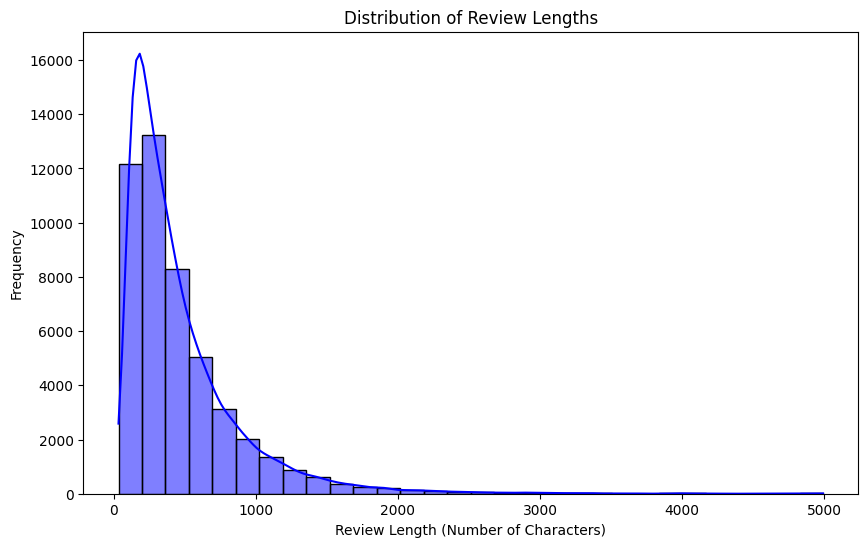

In [ ]:
# Calculate the length of each review
df['review_length'] = df['text'].apply(len)

# Display the first few rows to ensure the new column is added
print(df[['review_id', 'review_length']].head())

# Visualize the distribution of review length
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

**Build a BERTopic Model with UMAP (target dimension of 5, n_neighbors of 15, and the usage of cosine similarity to measure the distance).**

In [ ]:
!pip install bertopic umap-learn

import pandas as pd
from bertopic import BERTopic
import umap
from sklearn.preprocessing import StandardScaler

# Prepare the text data (assuming the 'text' column contains the review text)
documents = df['text'].tolist()

# Initialize the UMAP model with the required parameters
umap_model = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine', random_state=42)

# Initialize the BERTopic model with UMAP
topic_model = BERTopic(umap_model=umap_model)

# Fit the model on the documents (the text data)
topics, probabilities = topic_model.fit_transform(documents)

# Print the topics generated
print("Topics:")
for topic in set(topics):
    if topic != -1:  # Ignore the -1 topic (for noise)
        print(f"Topic {topic}: {topic_model.get_topic(topic)}")

# Optionally, view the most frequent topics
freq_topics = topic_model.get_topic_info()
print("\nMost Frequent Topics:")
print(freq_topics)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Topics:
Topic 0: [('she', 0.008631595403963882), ('her', 0.0060949601841744794), ('minutes', 0.0058523917912307235), ('order', 0.005695548832441355), ('us', 0.00568114235903994), ('said', 0.0055482329201726075), ('told', 0.005415421909312175), ('he', 0.005303175916051137), ('asked', 0.005155909415973384), ('me', 0.005137318978947857)]
Topic 1: [('pizza', 0.03463463322361973), ('crust', 0.01274695203401901), ('pizzas', 0.009908750187005435), ('pepperoni', 0.006409379953886308), ('toppings', 0.005676348971067487), ('slice', 0.005239489243970062), ('delivery', 0.004766250584266624), ('thin', 0.004659892405217891), ('cheese', 0.0043805724416118115), ('it', 0.004056316237901985)]
Topic 2: [('great', 0.00981769289611016), ('place', 0.008702711574517439), ('beer', 0.008677769566387569), ('food', 0.00712434756961109), ('friendly', 0.0064020619868088895), ('atmosphere', 0.0061898799267154385), ('is', 0.006140591835241412), ('love', 0.005999718787529021), ('staff', 0.005902562780820069), ('servi

**Visualize the most relevant words for the top 10 topics**

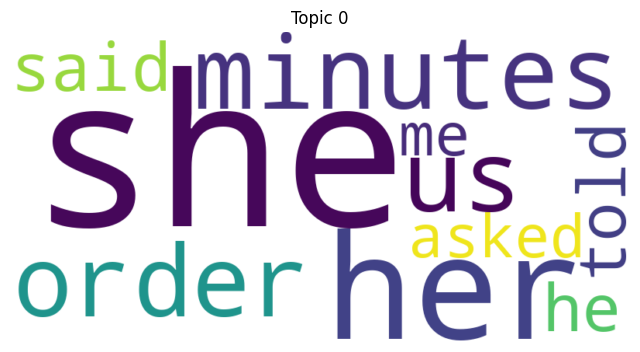

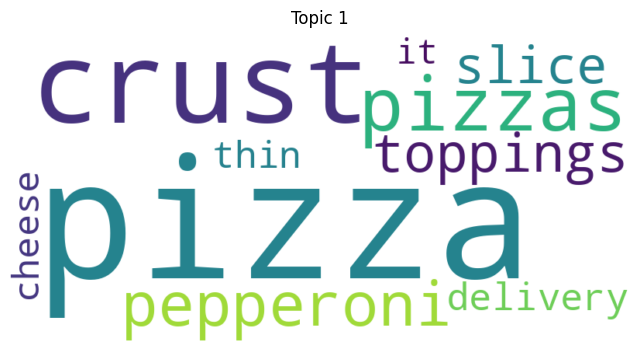

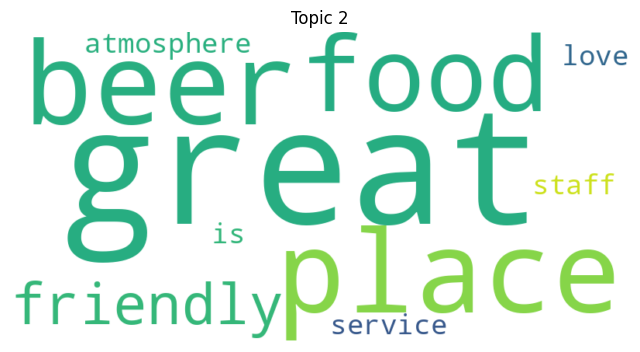

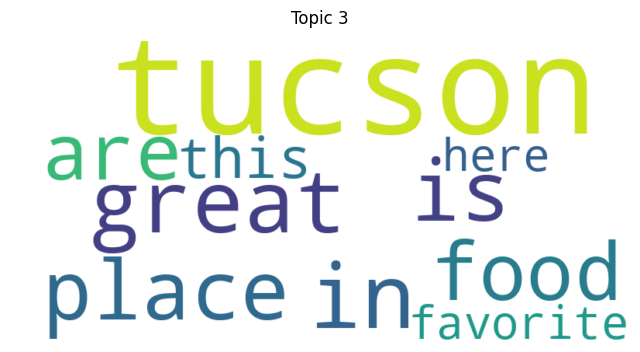

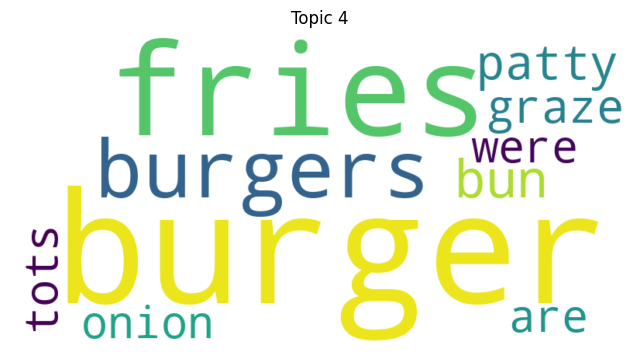

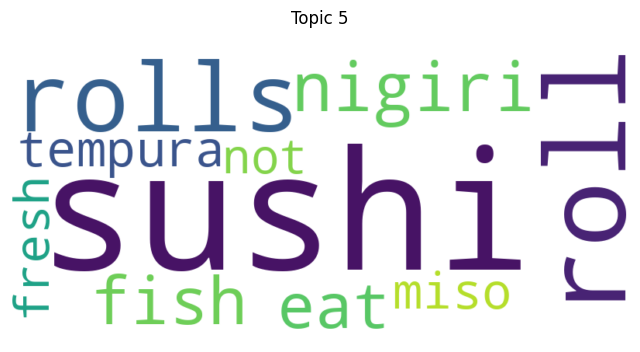

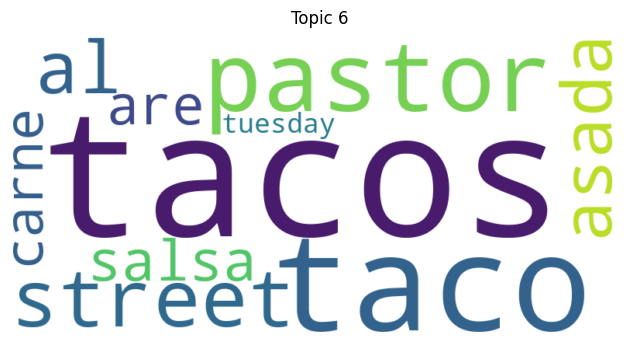

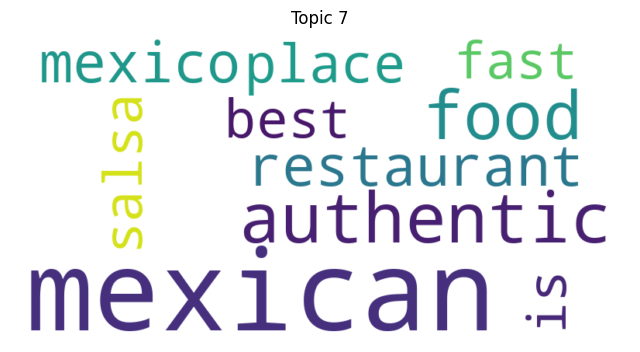

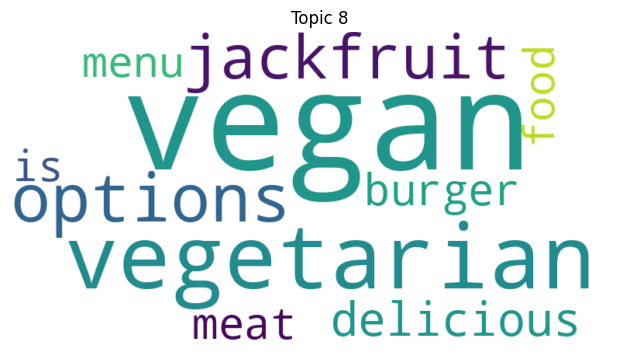

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have already built the BERTopic model (as per the previous step)
# The 'topic_model' is already fitted and we can use it to extract the top 10 topics.

# Get the top 10 topics based on frequency
top_topics = topic_model.get_topic_info().head(10)

# Plot the most relevant words for the top 10 topics
for topic in top_topics['Topic']:
    if topic != -1:  # Ignore noise (-1) topic
        # Extract the most relevant words for the topic
        words = topic_model.get_topic(topic)

        # Prepare word frequency for WordCloud
        word_freq = {word: weight for word, weight in words}

        # Create a WordCloud
        plt.figure(figsize=(8, 6))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        # Plot the WordCloud
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Topic {topic}")
        plt.axis('off')  # Turn off the axis
        plt.show()


**Visualize the topic hierarchy for the top 30 topics**

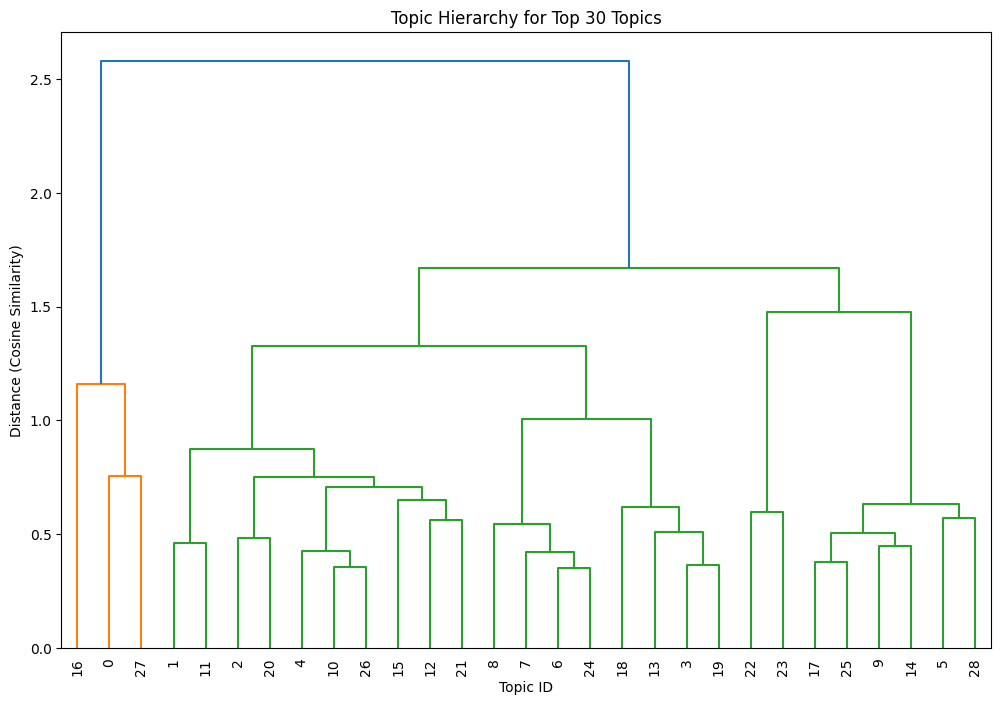

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'topic_model' is already fitted
# Get the top 30 topics based on frequency
top_topics = topic_model.get_topic_info().head(30)

# Extract the document vectors associated with the top 30 topics
topic_embeddings = []
for topic in top_topics['Topic']:
    if topic != -1:
        # Get the document indices belonging to the topic
        docs_indices = np.where(np.array(topics) == topic)[0]

        # Get document embeddings and stack them into a matrix
        doc_embeddings = topic_model.embedding_model.embed(np.array(documents)[docs_indices])

        #compute the mean topic vector
        topic_vector = np.mean(doc_embeddings, axis=0)
        topic_embeddings.append(topic_vector)

# Convert to a numpy array for cosine similarity calculation
topic_embeddings = np.array(topic_embeddings)


# Compute cosine similarity between the embeddings of the top topics
cosine_sim = cosine_similarity(topic_embeddings)

# Perform hierarchical clustering (linkage method: 'ward')
linkage_matrix = linkage(cosine_sim, method='ward')

# Visualize the hierarchical clustering using a dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=top_topics['Topic'].values[top_topics['Topic'] != -1], orientation='top', leaf_rotation=90)
plt.title("Topic Hierarchy for Top 30 Topics")
plt.xlabel("Topic ID")
plt.ylabel("Distance (Cosine Similarity)")
plt.show()

**Reduce the number of topics to 15, visualize the most relevant words for each topic and the topic hierarchy**

Cluster 2 - Representative Topic -1:


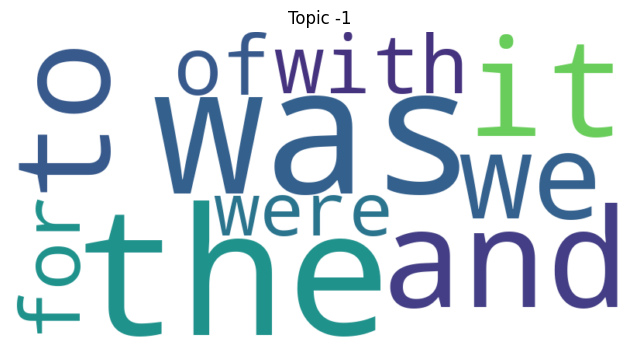

Cluster 10 - Representative Topic 0:


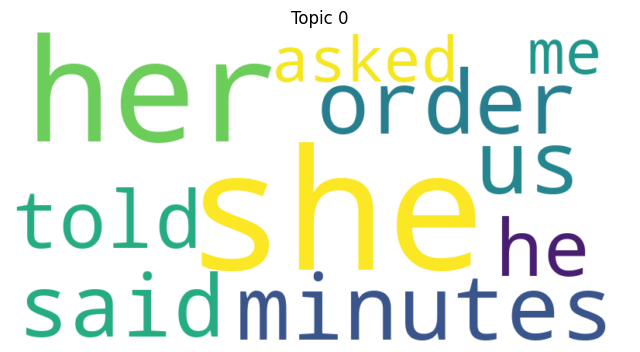

Cluster 6 - Representative Topic 1:


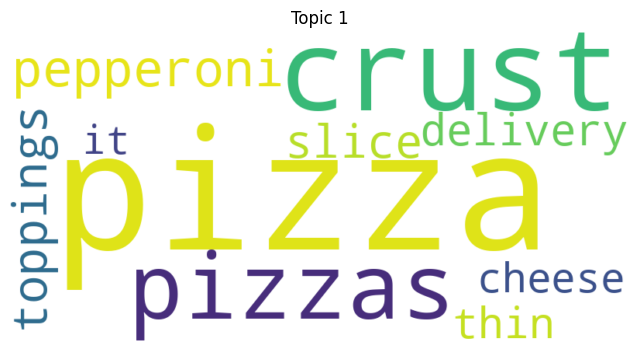

Cluster 8 - Representative Topic 3:


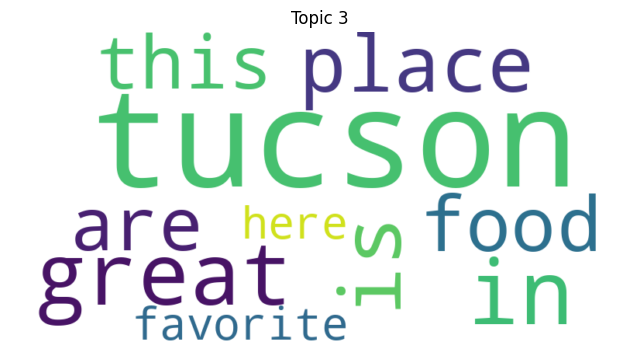

Cluster 4 - Representative Topic 4:


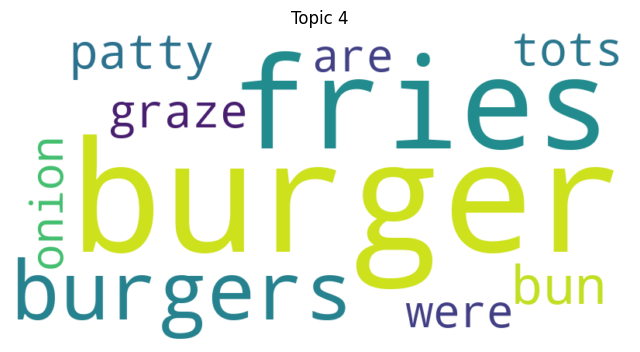

Cluster 12 - Representative Topic 5:


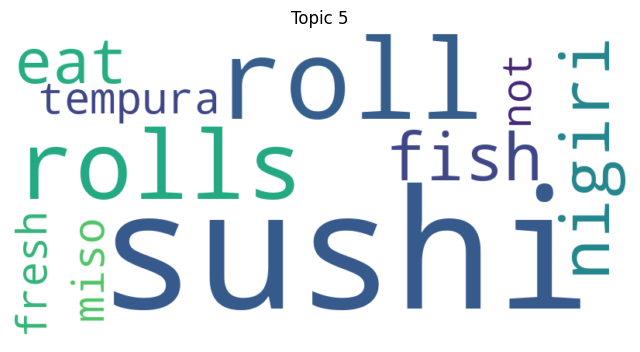

Cluster 14 - Representative Topic 6:


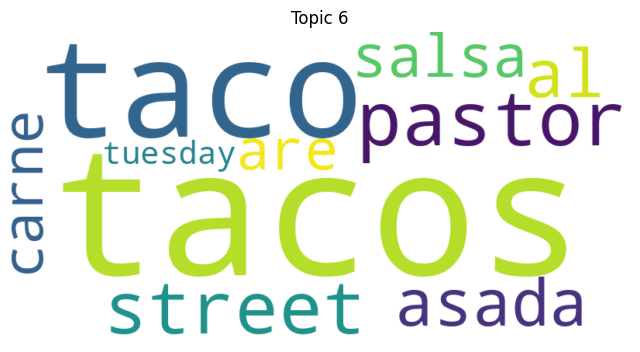

Cluster 9 - Representative Topic 7:


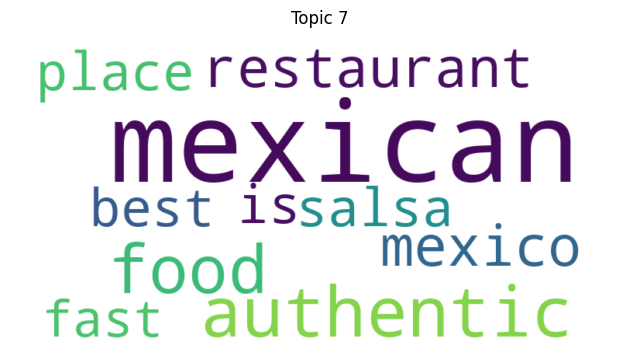

Cluster 0 - Representative Topic 9:


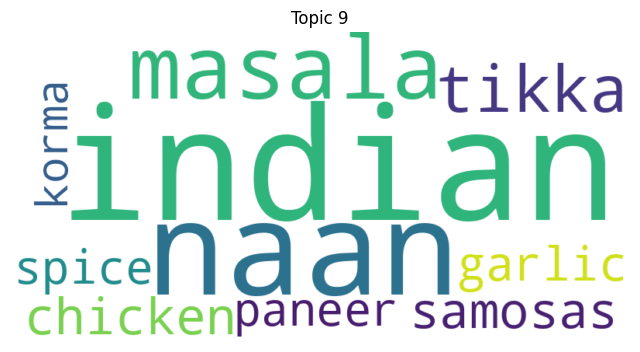

Cluster 11 - Representative Topic 15:


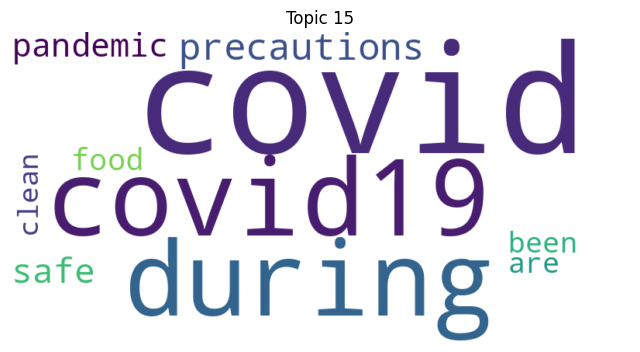

Cluster 5 - Representative Topic 16:


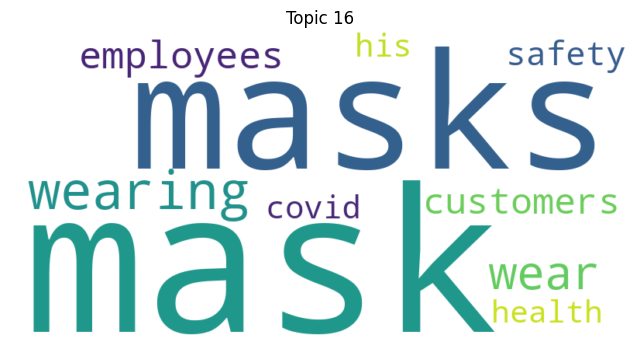

Cluster 3 - Representative Topic 20:


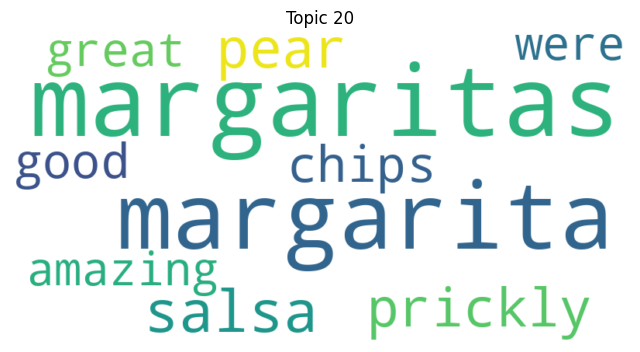

Cluster 7 - Representative Topic 22:


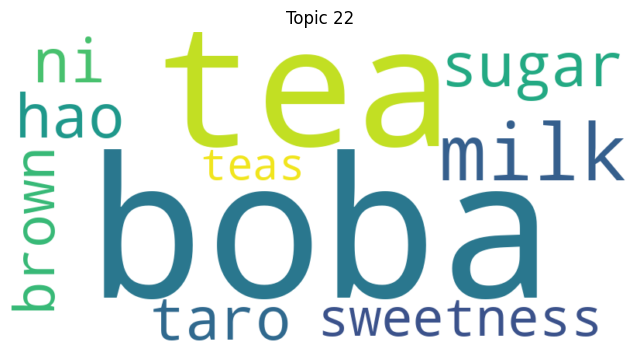

Cluster 13 - Representative Topic 23:


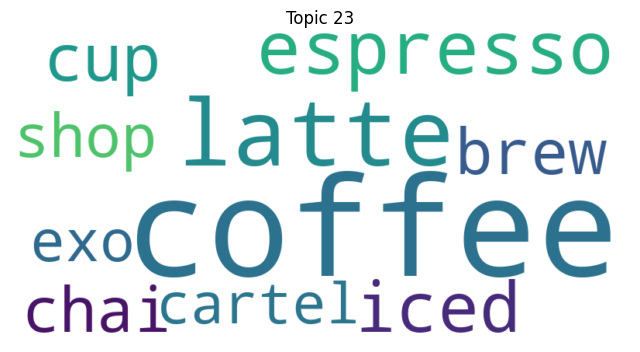

Cluster 1 - Representative Topic 27:


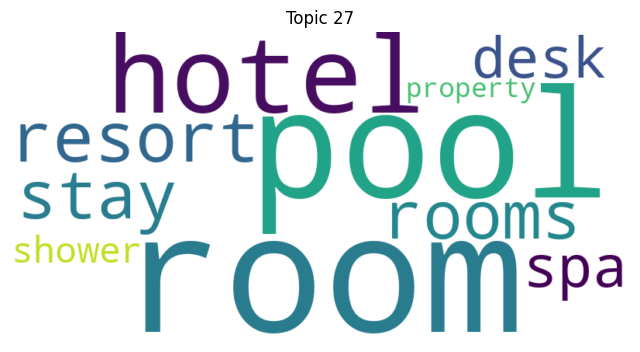

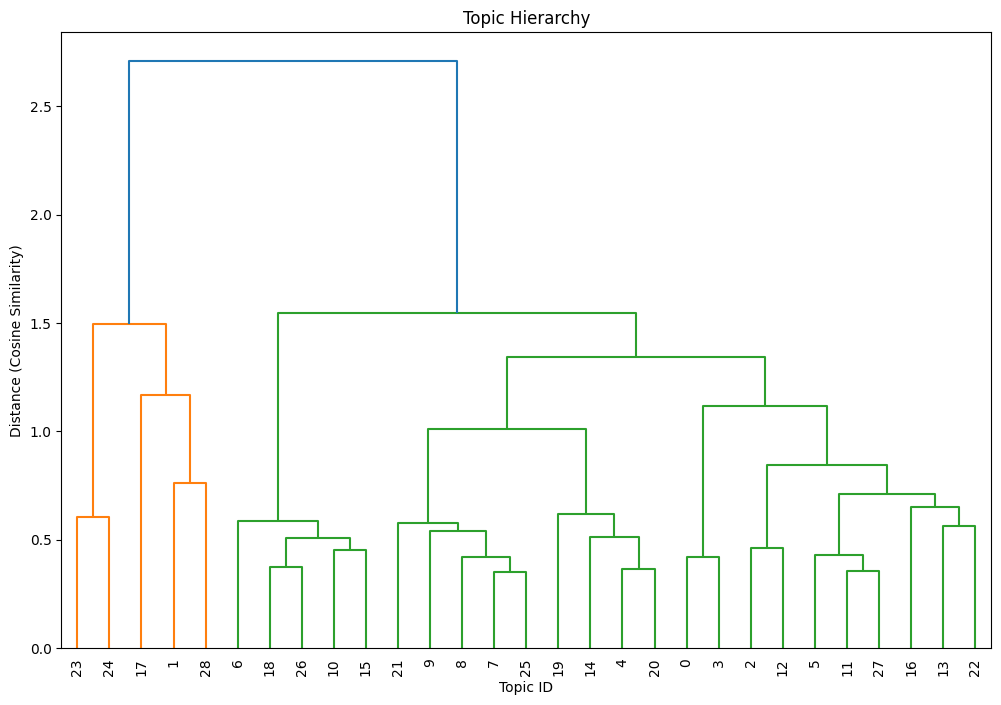

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# Assuming 'topic_model' is already fitted
# Get the top 30 topics based on frequency (or any other method)
top_topics = topic_model.get_topic_info().head(30)

topic_embeddings = np.array([topic_model.topic_embeddings_[topic] for topic in top_topics['Topic'] if topic != -1])



# Compute cosine similarity between the embeddings of the top topics
cosine_sim = cosine_similarity(topic_embeddings)

# Perform clustering to reduce the number of topics to 15 using KMeans
kmeans = KMeans(n_clusters=15, random_state=42)
reduced_topics = kmeans.fit_predict(cosine_sim)

# Map each original topic to its new cluster
topic_cluster_map = {top_topics.iloc[i]['Topic']: reduced_topics[i] for i in range(len(reduced_topics))}

# Now, we'll merge the topics based on their new cluster labels
merged_topics = {}
for original_topic, cluster_id in topic_cluster_map.items():
    if cluster_id not in merged_topics:
        merged_topics[cluster_id] = []
    merged_topics[cluster_id].append(original_topic)

# Visualize the most relevant words for each of the 15 new topics
for cluster_id, topics in merged_topics.items():
    # Choose the most frequent topic in the cluster as the representative
    representative_topic = topics[0]  # You could choose the most frequent topic or other criteria
    print(f"Cluster {cluster_id} - Representative Topic {representative_topic}:")
    words = topic_model.get_topic(representative_topic)

    # Prepare word frequency for WordCloud
    word_freq = {word: weight for word, weight in words}

    # Create a WordCloud for the topic
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {representative_topic}")
    plt.axis('off')  # Turn off the axis
    plt.show()

# Perform hierarchical clustering (linkage method: 'ward') on the topic embeddings
linkage_matrix = linkage(cosine_sim, method='ward')

# Visualize the hierarchical clustering using a dendrogram
plt.figure(figsize=(12, 8))

# The labels should match the number of data points used to generate the linkage matrix, which is the number of rows in cosine_sim.
dendrogram(linkage_matrix, labels=[str(i) for i in range(len(cosine_sim))], orientation='top', leaf_rotation=90)

plt.title("Topic Hierarchy")
plt.xlabel("Topic ID")
plt.ylabel("Distance (Cosine Similarity)")
plt.show()


**Get the topic allocation of the first 5 reviews in the data**

In [ ]:
# Get the topic allocation for the first 5 reviews
topic_allocation = topic_model.transform(documents[:5])

# Display the topic allocation for the first 5 reviews
print("Topic Allocation for the First 5 Reviews:")
for idx, topic in enumerate(topic_allocation[0]):
    print(f"Review {idx+1}: Assigned Topic - {topic}")

Topic Allocation for the First 5 Reviews:
Review 1: Assigned Topic - 190
Review 2: Assigned Topic - -1
Review 3: Assigned Topic - 11
Review 4: Assigned Topic - 3
Review 5: Assigned Topic - -1


**Use get_topic() to show most relevant words for the first topic**

In [ ]:
# Assuming 'topic_model' is already fitted and you're using the first topic (topic 0)
topic_id = 0  # Topic ID for the first topic

# Get the most relevant words for the first topic
relevant_words = topic_model.get_topic(topic_id)

# Display the most relevant words
print(f"Most relevant words for Topic {topic_id}:")
for word, weight in relevant_words:
    print(f"{word}: {weight}")


Most relevant words for Topic 0:
she: 0.008631595403963882
her: 0.0060949601841744794
minutes: 0.0058523917912307235
order: 0.005695548832441355
us: 0.00568114235903994
said: 0.0055482329201726075
told: 0.005415421909312175
he: 0.005303175916051137
asked: 0.005155909415973384
me: 0.005137318978947857


**Interpret each topic: What is the theme of each topic?**


Theme of top 10 topics using the most relevant words:

taking order by restaurant staff, features of pizza, atmosphere of the restaurant, location of restaurant in Tucson, features of burger and fries, features of sushi, features of taco, features of a Mexican restaurant, features of a vegan restaurant


**Visualize the topic frequency of the top 6 topics over time with the entire dataset.**

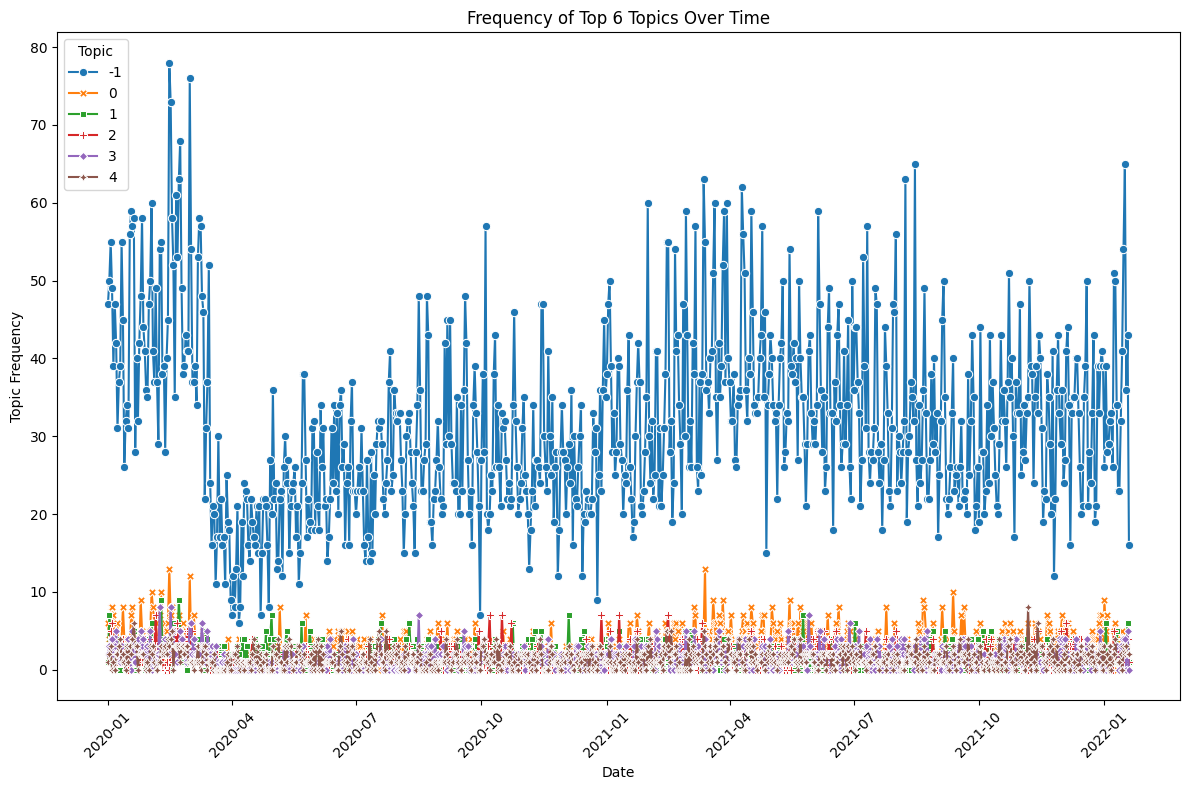

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare the text data (assuming the 'text' column contains the review text)
documents = df['text'].tolist()

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Assuming 'topic_model' is already fitted and you want to analyze the first 6 topics
# Get the topic allocations for all the reviews
topic_allocation, _ = topic_model.transform(documents)

# Add the topic allocation to the DataFrame
df['topic'] = topic_allocation

# Get the frequency of the top 6 topics over time
# We will focus on the first 6 topics (top 6 based on frequency or custom choice)
top_6_topics = df['topic'].value_counts().nlargest(6).index.tolist()

# Filter the dataset to include only the top 6 topics
df_top_6 = df[df['topic'].isin(top_6_topics)]

# Group by date and topic, and count the occurrences of each topic per day
topic_frequency_over_time = df_top_6.groupby([df_top_6['date'].dt.date, 'topic']).size().reset_index(name='count')

# Pivot the table to have topics as columns and dates as rows
topic_pivot = topic_frequency_over_time.pivot_table(index='date', columns='topic', values='count', fill_value=0)

# Plot the topic frequency over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=topic_pivot, dashes=False, markers=True)
plt.title("Frequency of Top 6 Topics Over Time")
plt.xlabel("Date")
plt.ylabel("Topic Frequency")
plt.legend(title="Topic", loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Visualize the topics per star rating (e.g., 1, 2, 3, 4, 5).**

<Figure size 1200x800 with 0 Axes>

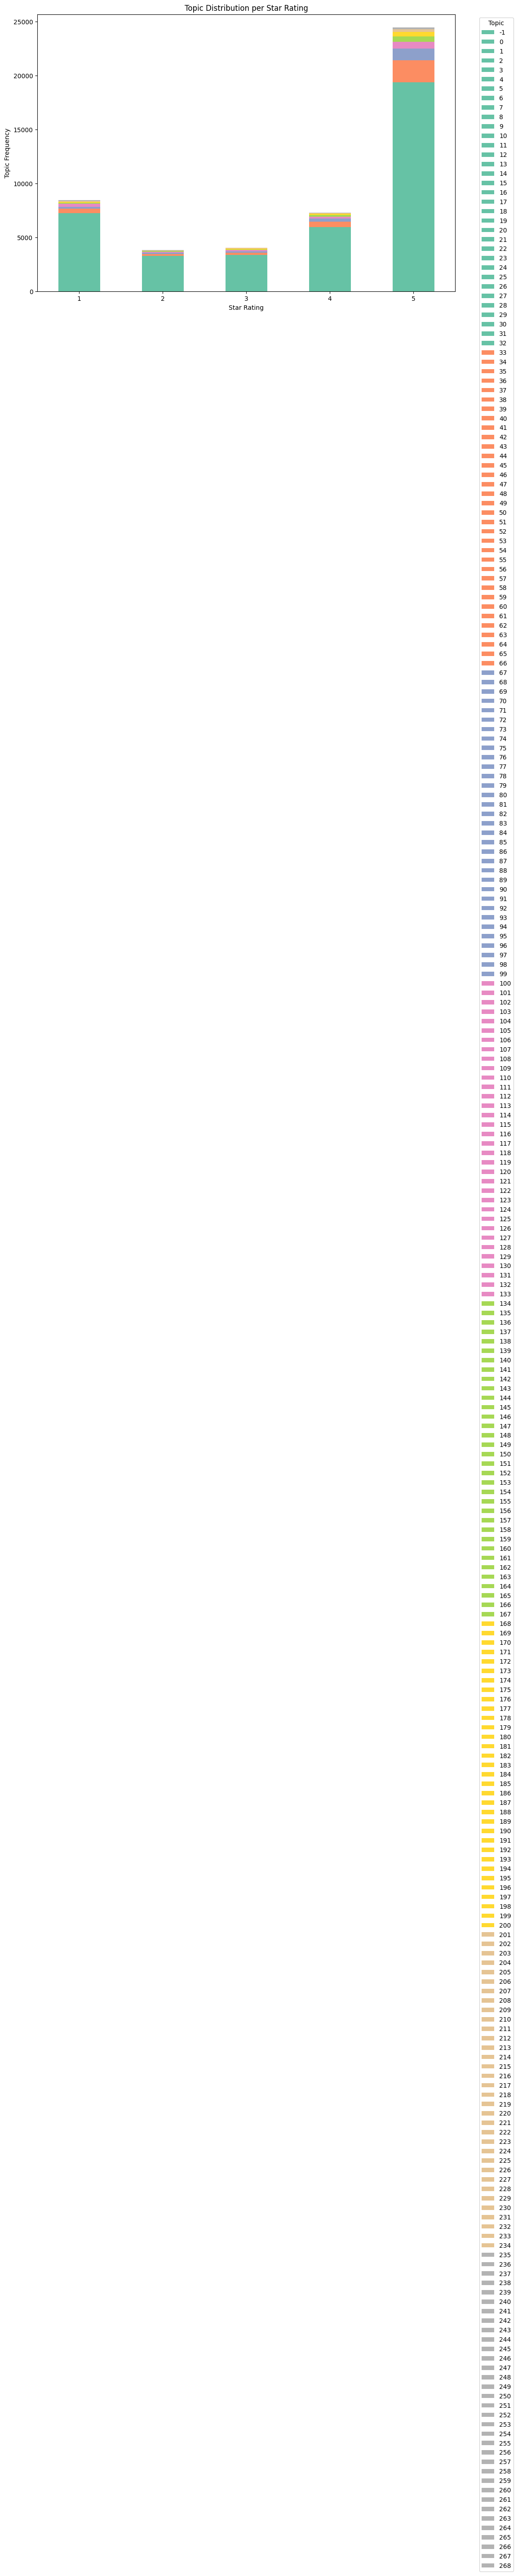

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the restaurant review data
file_path = r'/content/sample_data/restaurant_reviews_az.csv'
df = pd.read_csv(file_path)

# Ensure the 'date' column is in datetime format (if needed)
df['date'] = pd.to_datetime(df['date'])

# Prepare the text data (assuming the 'text' column contains the review text)
documents = df['text'].tolist()

# Assuming 'topic_model' is already fitted
# Get the topic allocations for all reviews
topic_allocation, _ = topic_model.transform(documents)

# Add the topic allocation to the DataFrame
df['topic'] = topic_allocation

# Group by star rating and topic, and count the occurrences of each topic per star rating
topic_per_star = df.groupby(['stars', 'topic']).size().reset_index(name='count')

# Pivot the table to have topics as columns and star ratings as rows
topic_pivot = topic_per_star.pivot_table(index='stars', columns='topic', values='count', fill_value=0)

# Plot the topic distribution per star rating
plt.figure(figsize=(12, 8))
topic_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title("Topic Distribution per Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Topic Frequency")
plt.xticks(rotation=0)
plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Comment on your findings based on the visualized topic frequency over time and topics per star rating in Code cells 10 and 11. In general, what are the major topics mentioned about good and bad restaurant experiences, respectively? What are the business implications?**


Major Themes of Good and Bad Experiences:


For Positive Experiences (5-star reviews)

Good food quality (e.g., taste, presentation, freshness),
Excellent service (e.g., friendly staff, prompt service),
Ambiance and atmosphere (e.g., cozy, lively),
Value for money (e.g., reasonable prices for portion sizes)


For Negative Experiences (1-2 star reviews)

Poor service (e.g., slow, rude staff),
Bad food quality (e.g., cold food, lack of freshness),
Long wait times (e.g., delays in seating, food preparation),
High prices for perceived low quality


**Specify a few topics in the restaurant reviews and use zero shot topic modeling to create a topic model**


In [ ]:
import pandas as pd
from transformers import pipeline

# Load Zero-Shot Classification pipeline with the specified model
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Load restaurant reviews from CSV (assuming column name is 'text')
# Importing the restaurant review data
file_path = r'/content/sample_data/restaurant_reviews_az.csv'
df = pd.read_csv(file_path)



# Define relevant restaurant topics
topics = ["food quality", "service", "pricing", "ambiance", "hygiene"]

# Function to classify each review into topics
def classify_review(review):
    if pd.isna(review):  # Handle missing values
        return ""

    result = classifier(review, topics, multi_label=True)

    # Select topics with high confidence (adjust threshold if needed)
    selected_topics = [label for label, score in zip(result["labels"], result["scores"]) if score > 0.3]

    return ", ".join(selected_topics)  # Convert list to a comma-separated string

# Apply classification to each review in the 'text' column
df["topics"] = df["text"].apply(classify_review)

# Save results to a new CSV file
output_csv = "restaurant_reviews_with_topics.csv"
df.to_csv(output_csv, index=False)

print(f"Topic modeling completed! Results saved to {output_csv}")


Device set to use cpu


**Visualize the most relevant words for the top 10 topics and the topic hierarchy for the zero shot topic model**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load and preprocess the data
file_path = r'/content/sample_data/restaurant_reviews_az.csv'
df = pd.read_csv(file_path)


# Clean text data (lowercase, remove punctuation, etc.)
df['text'] = df['text'].apply(lambda x: str(x).lower())

# Step 2: Zero-shot topic modeling using Hugging Face's transformer pipeline
# Using the ZeroShotClassification pipeline from Hugging Face
zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define candidate labels (you can customize these based on your knowledge of possible topics)
candidate_labels = ["restaurant", "service", "food", "ambiance", "price", "location", "staff", "cleanliness", "comfort", "experience"]

# Apply zero-shot classification to each review text
def classify_review(text):
    result = zero_shot_classifier(text, candidate_labels)
    return result['labels'][0], result['scores'][0]  # Get top label and score

# Apply the classification function to the 'text' column
df['topic'], df['confidence'] = zip(*df['text'].apply(classify_review))

# Step 3: Visualize the most relevant words for the top 10 topics
# For visualization, we can use the CountVectorizer to find the most frequent words per topic

top_10_topics = df['topic'].value_counts().head(10).index.tolist()

# For each top topic, generate the most frequent words in its reviews
vectorizer = CountVectorizer(stop_words='english', max_features=50)

for topic in top_10_topics:
    # Filter reviews for this topic
    reviews_for_topic = df[df['topic'] == topic]['text']

    # Fit the CountVectorizer on the reviews
    X = vectorizer.fit_transform(reviews_for_topic)

    # Get words and their corresponding frequencies
    words = vectorizer.get_feature_names_out()
    word_freq = X.sum(axis=0).A1
    word_freq_dict = dict(zip(words, word_freq))

    # Visualize with WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Relevant Words for Topic: {topic}')
    plt.axis('off')
    plt.show()

# Step 4: Topic hierarchy visualization using hierarchical clustering
# Calculate the cosine similarity between the topics based on their term frequency

# Create a list of reviews for each topic
topic_reviews = [df[df['topic'] == topic]['text'].values for topic in top_10_topics]

# Create term-frequency matrix for each topic
topic_term_matrix = []
for reviews in topic_reviews:
    X = vectorizer.fit_transform(reviews)
    topic_term_matrix.append(X.sum(axis=0).A1)

# Calculate cosine similarity between topics
cosine_similarities = cosine_similarity(topic_term_matrix)

# Perform hierarchical clustering using the cosine similarity matrix
Z = linkage(cosine_similarities, method='ward')

# Plot the hierarchical clustering dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=top_10_topics, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Topic Hierarchy (Dendrogram)")
plt.xlabel("Topics")
plt.ylabel("Distance")
plt.show()


**Interpret each topic in the zero shot topic model: what is each topic about?**

The topics are about reviews of restaurants in Arizona.

#Acknowledgement
GenAI tools have been used to rectify errors in Python code.

In [ ]:
!pip install jupyter
!pip install nbconvert

from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/LA5_Astha_Garima.ipynb" --to html



from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/LA5_Astha_Garima.html')